In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import pandas as pd

Logistic Regression Train Accuracy: 0.947
Logistic Regression Test Accuracy: 1.000
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



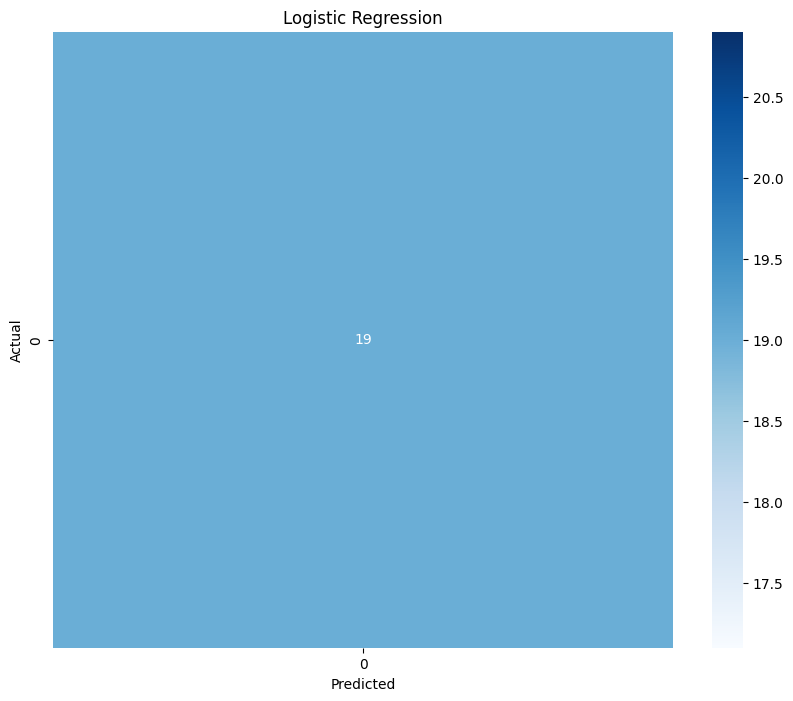

Decision Tree Train Accuracy: 0.974
Decision Tree Test Accuracy: 1.000
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



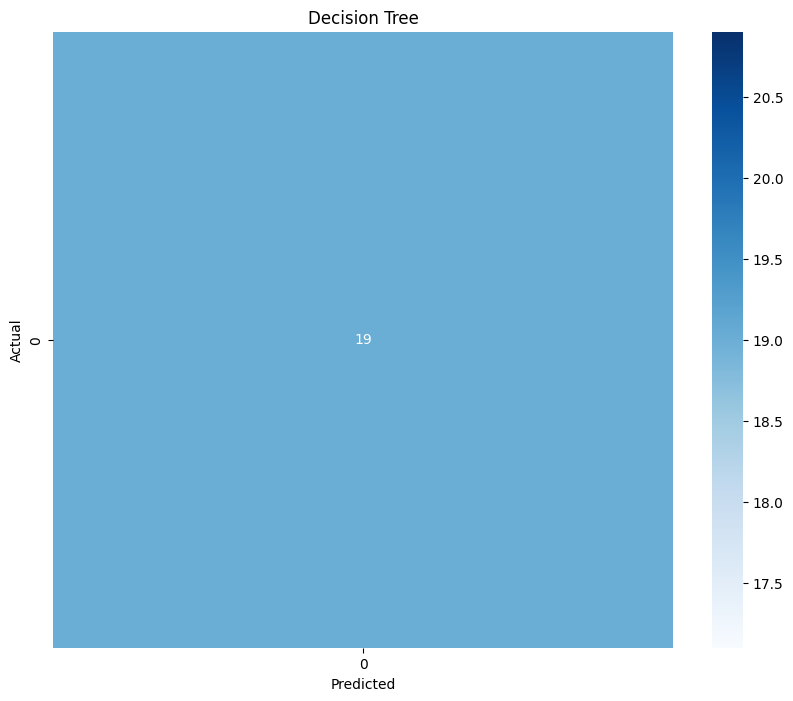

SVM Train Accuracy: 0.934
SVM Test Accuracy: 1.000
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



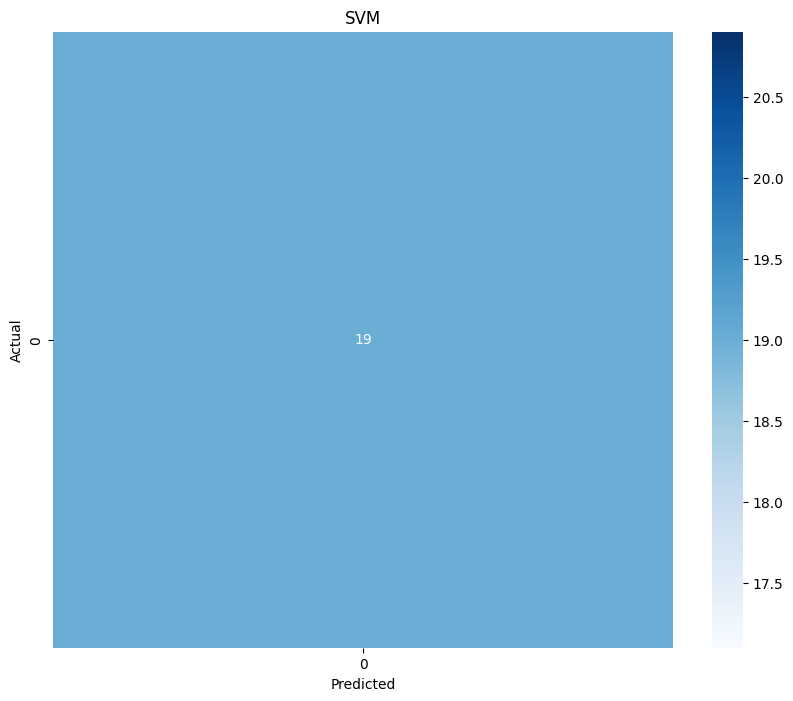

K-Nearest Neighbors Train Accuracy: 0.868
K-Nearest Neighbors Test Accuracy: 1.000
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



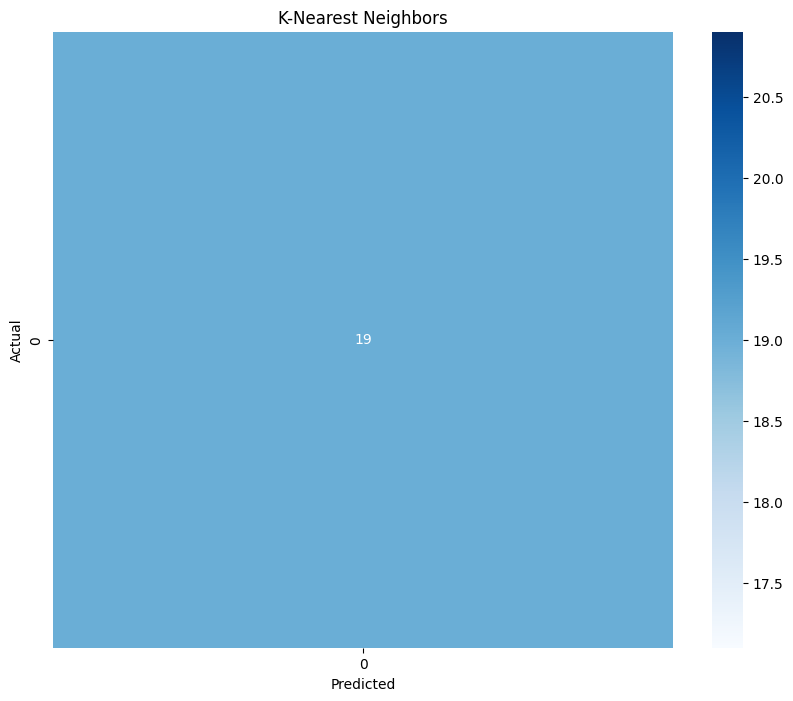

Random Forest Train Accuracy: 0.974
Random Forest Test Accuracy: 1.000
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



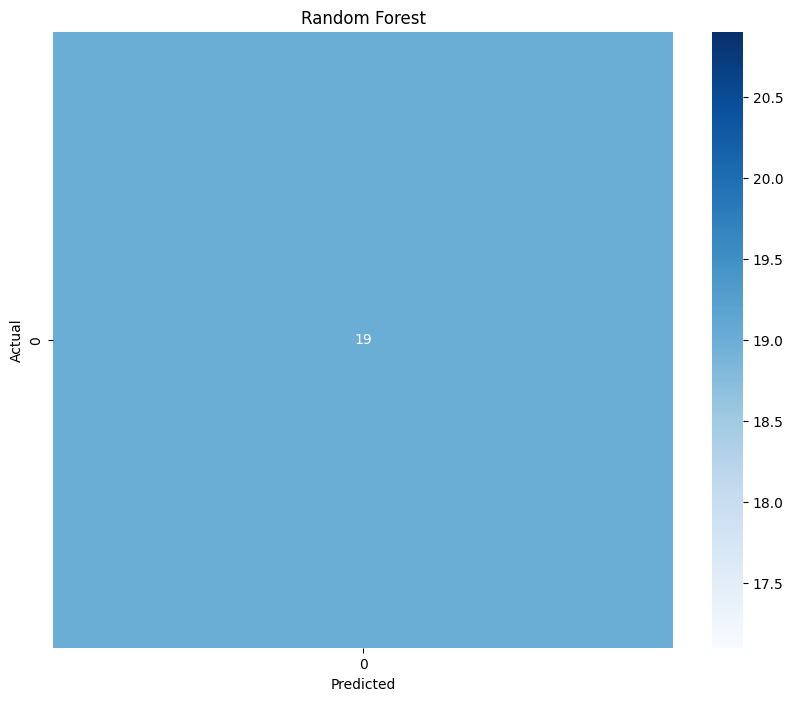

In [3]:
data = pd.read_csv(r"C:\Users\00220401626\Desktop\必要なファイル\Classification.csv",encoding='cp932')

le = LabelEncoder()
data['judge'] = le.fit_transform(data['judge'])

X = data.drop('judge', axis=1)
y = data['judge']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42)
}

pipelines = {name: Pipeline([('scl', StandardScaler()), ('clf', model)]) for name, model in models.items()}


for name, pipeline in pipelines.items():

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(name + ' Train Accuracy: %.3f' % pipeline.score(X_train, y_train))
    print(name + ' Test Accuracy: %.3f' % pipeline.score(X_test, y_test))
    print(classification_report(y_test, y_pred))
    confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    fig, ax = plt.subplots(figsize=(10, 8))
    # ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    sns.heatmap(confmat, annot=True, cmap="Blues", fmt="d")
    plt.title(str(name))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

R2 score: 0.15


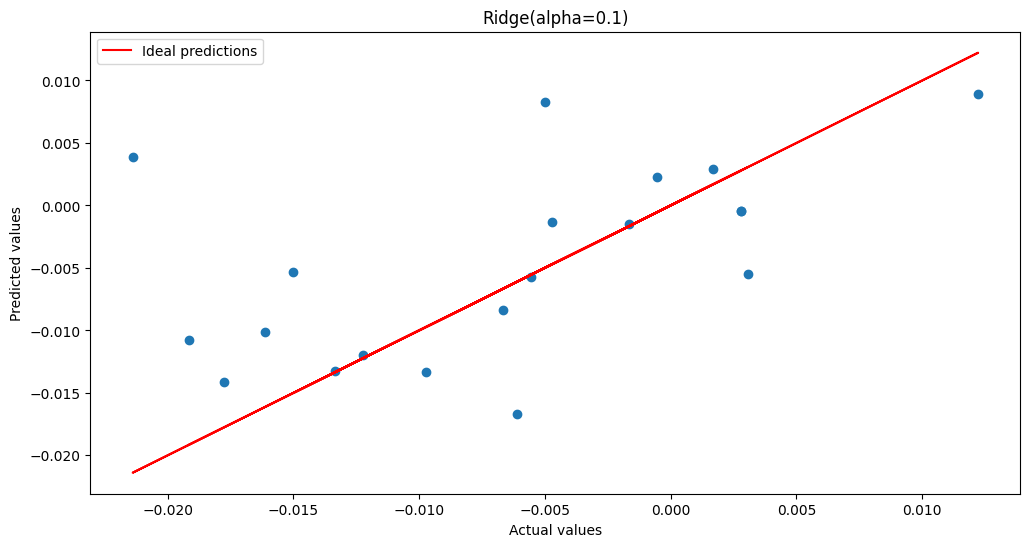

R2 score: -0.02


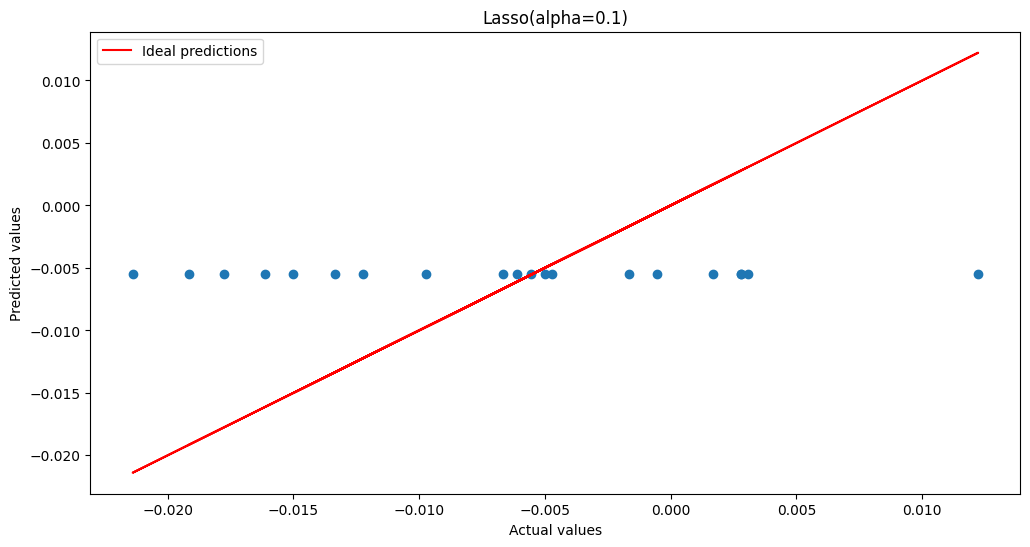

R2 score: 0.17


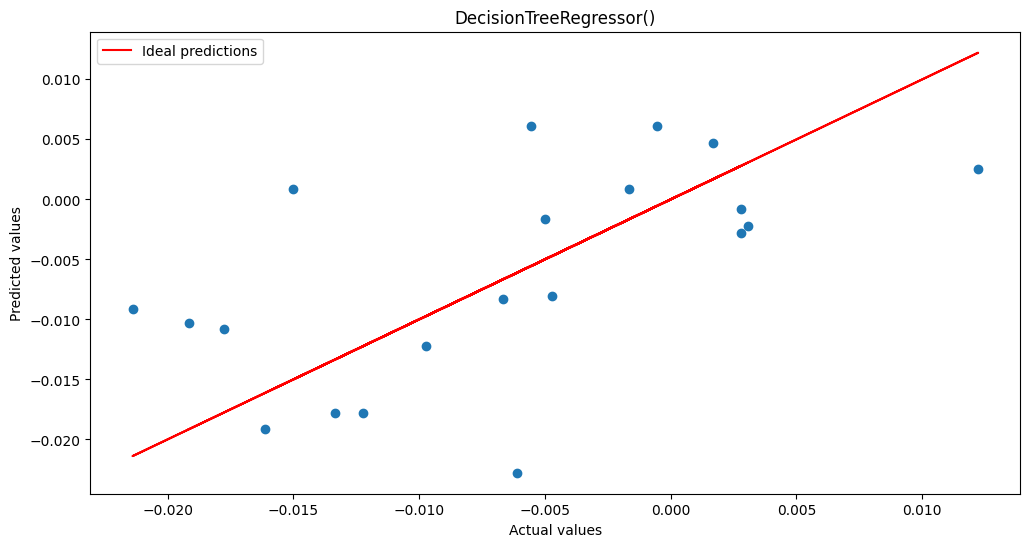

R2 score: 0.15


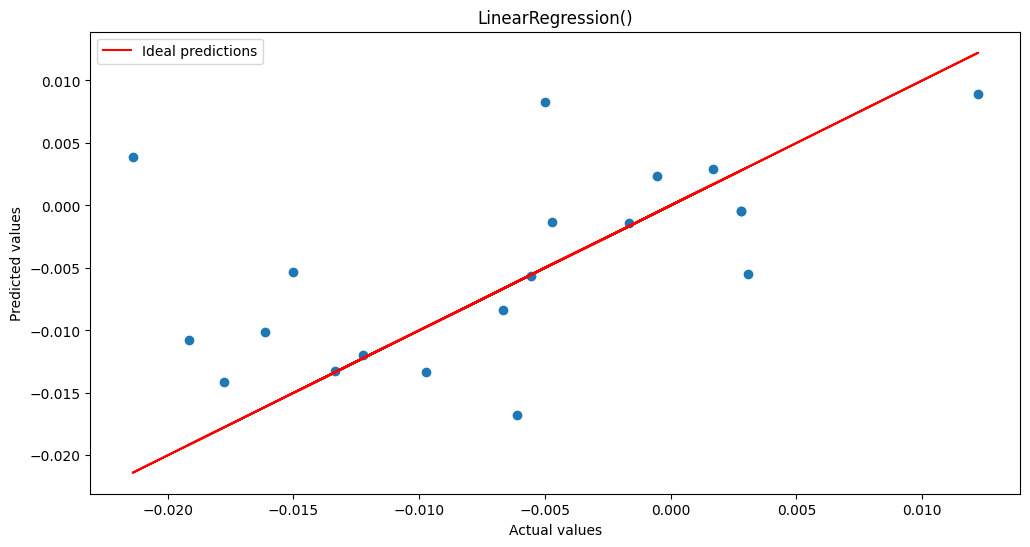

R2 score: 0.37


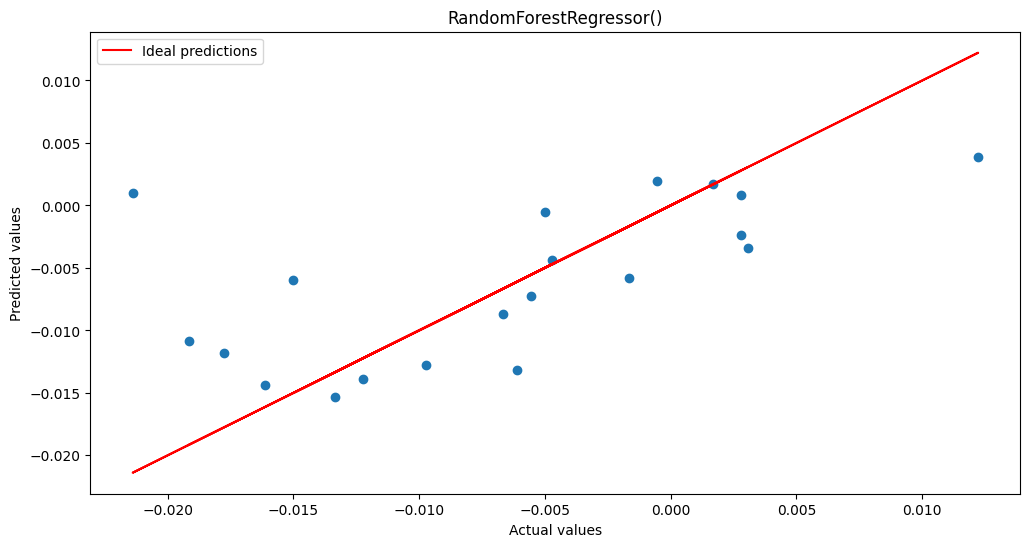

In [4]:
data = pd.read_csv(r"C:\Users\00220401626\Desktop\必要なファイル\Regression.csv",encoding='cp932')

X = data.drop('Angl_gosa', axis=1)
y = data['Angl_gosa']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

models = [Ridge(alpha=0.1), Lasso(alpha=0.1) ,DecisionTreeRegressor(), LinearRegression(), RandomForestRegressor()]

for i, model in enumerate(models):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    print('R2 score: {:.2f}'.format(r2))
    
    plt.figure(figsize=(12, 6))
    plt.scatter(y_test, y_pred)
    plt.plot(y_test, y_test, color='red', label='Ideal predictions')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.title(str(model))
    plt.legend()
    plt.show()